# The first thing we'll do is import two key data analysis modules: *pandas* and **Numpy**.

In [2]:
import numpy as np
import pandas as pd

In [3]:
#import dataset
df = pd.read_csv('london_crime_by_lsoa.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
# Let's view the top 5 rows of the dataset using the head() function.
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
# Let's view the bottom 5 rows of the dataset using the tail() function.
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [6]:
# Show missing data
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [7]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [8]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [9]:
df.shape

(13490604, 7)

In [10]:
criminal = df[df['value'] == 1]

In [11]:
criminal

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


In [12]:
print("describing categorical columns : ")

df.describe(exclude="number")

describing categorical columns : 


,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Theft From Motor Vehicle
freq,3456,602100,3966300,522180


In [13]:
print("describing numerical columns : ")

df.describe().T

describing numerical columns : 


,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


In [14]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Theft From Motor Vehicle,522180


In [15]:
#import the library
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style

# Area Pots (Series/Dataframe) 

Questions:
From the highest minor category crime in London, what year the highest number of criminal cases?

In [17]:
#Write the function to display the number of crime of minor category and sort it by the highest number of crime
df_minor = df.groupby(['minor_category']).agg(number_of_crime= pd.NamedAgg('value',np.sum))
df_minor.sort_values(['number_of_crime'],ascending=[False])

,number_of_crime
minor_category,
Other Theft,980085
Theft From Motor Vehicle,569956
Burglary in a Dwelling,491282
Harassment,458124
Assault with Injury,451001
Possession Of Drugs,431948
Common Assault,413690
Theft From Shops,345142
Other Theft Person,308842


In [18]:
# The highest number of crime  of this Category is Other Theft

In [19]:
# Breakdown Minor Category by year and sort by ascending to see how many event happen by Years
df_minor = df.groupby(['minor_category','year']).agg(number_of_crime= pd.NamedAgg('value',np.sum))
df_minor
df_minor.sort_values(['number_of_crime'],ascending=[False])

number_of_crime
minor_category        year                 
Other Theft           2012           132056
                      2013           115757
                      2011           113616
                      2014           108577
                      2015           107571
...                                     ...
Other Sexual          2011                0
                      2012                0
                      2013                0
                      2014                0
Other Fraud & Forgery 2015                0

[288 rows x 1 columns]

In [20]:
# From "Other Theft" we can see how many event happen by the Year
Other_Theft = df_minor.loc["Other Theft"]
Other_Theft

,number_of_crime
year,
2008,99280
2009,95424
2010,103997
2011,113616
2012,132056
2013,115757
2014,108577
2015,107571
2016,103807


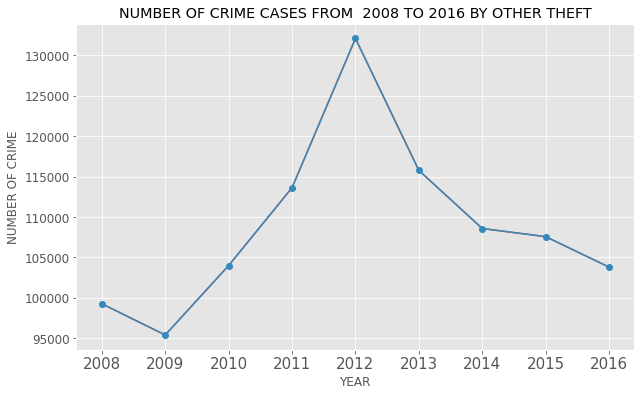

In [21]:
Other_Theft['number_of_crime'].plot(kind='line',stacked=False, figsize=(10,6), fontsize=12)
plt.plot(Other_Theft['number_of_crime'], 'o-')
plt.title('NUMBER OF CRIME CASES FROM  2008 TO 2016 BY OTHER THEFT') #title of plot area
plt.ylabel('NUMBER OF CRIME') # title of y-axis
plt.xlabel('YEAR') # title of x-axis
plt.xticks(fontsize=15) 
plt.show()

# Insight:

The highest crime in London by minor category is Other Theft and the highest cases happened in 2012.

# Histogram

Question :
How many borough that have >400.000 number of crime in London?

In [22]:
df_borough = df.groupby(['borough']).agg(number_of_crime= pd.NamedAgg('value',np.sum))
df_borough

,number_of_crime
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


[ 1  1  5  4 13  5  3  0  0  1]
[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


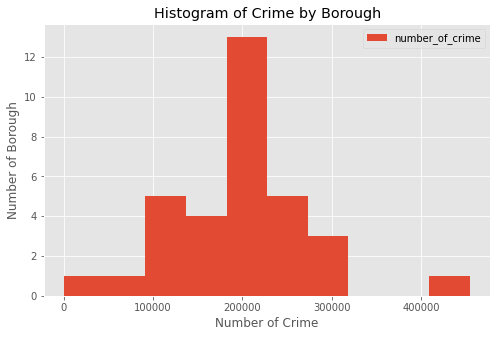

In [23]:
count, bin_edges = np.histogram(df_borough)
print(count)
print(bin_edges)

df_borough.plot(kind='hist', figsize=(8, 5))
# Graded-Funtion End

plt.title('Histogram of Crime by Borough') # add a title to the histogram
plt.ylabel('Number of Borough') # add y-label
plt.xlabel('Number of Crime') # add x-label

plt.show()

# Insight:
There is 1 borough that has > 400.000 number of crime in London.

# Bar Chart

Question:

From major category crime in London, what is the highest cases ?

In [24]:
df_major = df.groupby(['major_category']).agg(number_of_crime= pd.NamedAgg('value',np.sum))
df_major_sorted=df_major.sort_values("number_of_crime", ascending=False)
df_major_sorted

,number_of_crime
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


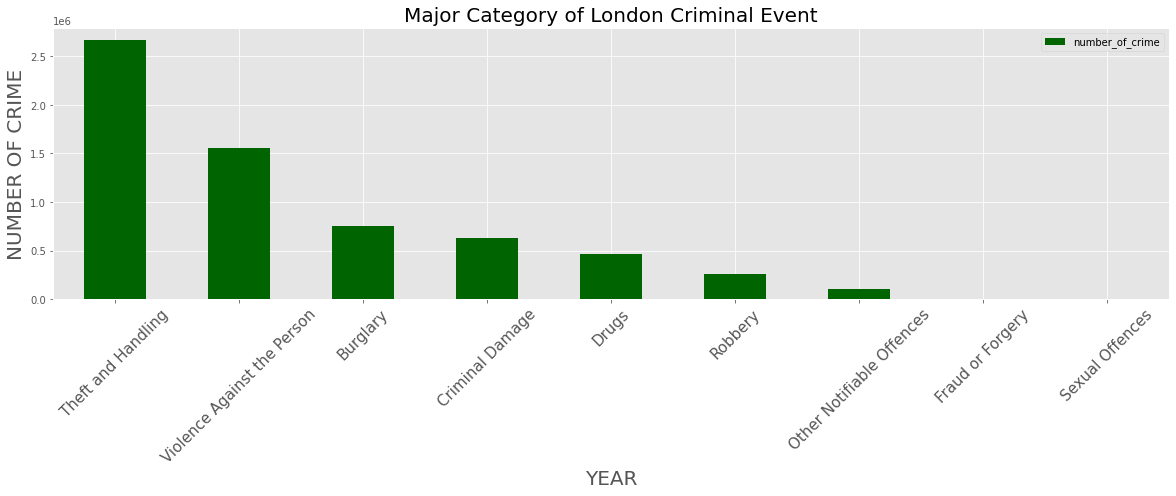

In [25]:
df_major_sorted.plot(
    kind="bar",
    figsize=(20, 5),
    color="darkgreen")

plt.title("Major Category of London Criminal Event",fontsize=20)
plt.xlabel("YEAR", fontsize=20)
plt.ylabel("NUMBER OF CRIME", fontsize=20)
plt.xticks(fontsize=15, rotation=45 )
plt.show()

# Insight:

From major category crime in London, the highest case is Theft and Handling

# Pie Chart
Question : 
From major_category,what is the highest cases?

In [26]:
df_major_pie = df.groupby('major_category', axis=0).sum()
df_major_pie

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


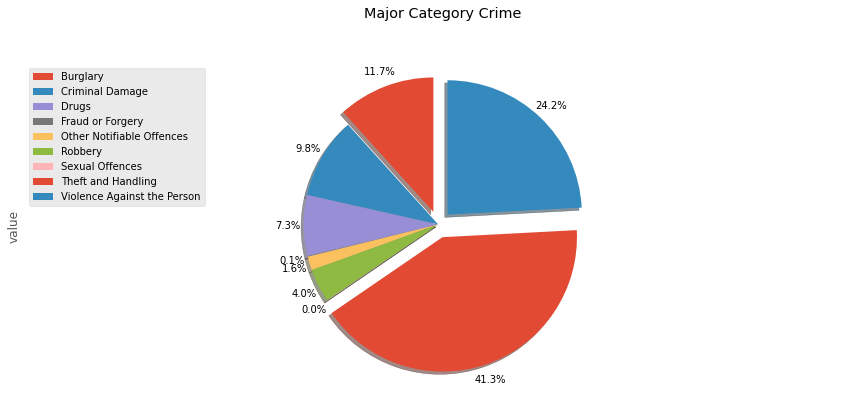

In [27]:
# Write your function below

# ratio for each continent with which to offset each wedge.
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

# Graded-Funtion Begin (~8 Lines)
df_major_pie['value'].plot(kind='pie',
                      figsize=(15, 6),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=None,         # turn off labels on pie chart
                      # the ratio between the center of each pie slice and the start of the text generated by autopct
                      pctdistance=1.12,
                      explode=explode_list  # 'explode'
                      )
# Graded-Funtion End

# scale the title up by 12% to match pctdistance
plt.title('Major Category Crime', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=df_major_pie.index, loc='upper left')

plt.show()

# Insight
From major category crime in London, the highest case is Theft and Handling.

# Box Plot

Question :
Are there any outliers in minor category data?

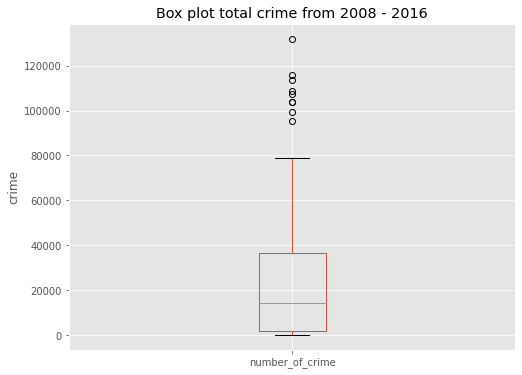

,number_of_crime
count,288.000000
mean,22388.048611
std,25200.721924
min,0.000000
25%,1996.250000
50%,14124.500000
75%,36349.500000
max,132056.000000


In [28]:
df_minor.plot(kind = 'box', figsize=(8,6))

plt.title('Box plot total crime from 2008 - 2016')
plt.ylabel('crime')

plt.show()
df_minor.describe()

# Insight:
Yes, there are outliers in this data

# Scatter Plot

Question :
From minor category, data when the highest case happened?

In [29]:
import seaborn as sns

In [30]:
df_major_year=df.groupby(['major_category','year']).agg(number_of_crime = pd.NamedAgg('value', np.sum))
major_per_year=df_major_year.reset_index()
major_per_year

,major_category,year,number_of_crime
0,Burglary,2008,88092
1,Burglary,2009,90619
2,Burglary,2010,86826
3,Burglary,2011,93315
4,Burglary,2012,93392
...,...,...,...
76,Violence Against the Person,2012,150014
77,Violence Against the Person,2013,146181
78,Violence Against the Person,2014,185349
79,Violence Against the Person,2015,218740


<AxesSubplot:xlabel='year', ylabel='number_of_crime'>

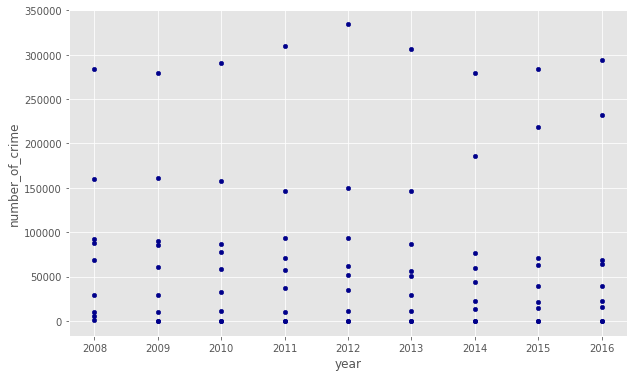

In [31]:
major_per_year.plot(kind='scatter', x='year', y='number_of_crime', figsize=(10, 6), color='darkblue')

# Insight:
The highest case occurred in 2012.

# Word Clouds

In [33]:
# Install wordcloud
!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [34]:
stopwords = set(STOPWORDS)

In [35]:
# instantiate a word cloud object
my_wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
my_wordcloud.generate(str(df['major_category']))

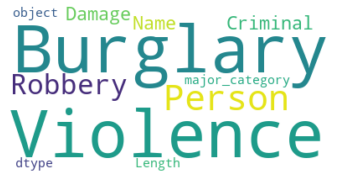

In [36]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
plt.imshow(my_wordcloud, interpolation='bilinear')
# Graded-Funtion End

plt.axis('off')
plt.show()

In [37]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [38]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [39]:
# define The latitude of London, the UK is 51.509865, and the longitude is -0.118092.
latitude = 51.509865
longitude = -0.118092

world_map = folium.Map(location=(latitude, longitude),zoom_start=8)
# display world map
world_map

# Thank you !